In [26]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns
from sklearn.model_selection import ParameterGrid

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/thethien8a/Forecasting/refs/heads/main/study-2/course-material/Modern%20Time%20Series%20Forecasting%20Techniques/Prophet/Daily%20Bike%20Sharing%20training.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [5]:
df = df.rename(columns = {'cnt':'y',
                          'dteday':'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Prepare the weather situation variable
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df,weather_sit], axis=1)

In [8]:
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [9]:
# Renaming variables
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})

In [10]:
# Drop variables that are not needed
df.drop(columns=['instant', 'season', 'yr', 'mnth', 'weekday',
                 'casual', 'registered','weathersit'], inplace=True)

In [11]:
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [50]:
# Replace 29/30 of October 2012 with the values of 28th
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29','y'] = to_replace
df.loc[df.ds == '2012-10-30','y'] = to_replace

### Exploratory Data Analysis

In [12]:
# Create a copy of the df with index
df_temp = df.copy()

In [13]:
df_temp.set_index('ds', inplace=True)

In [14]:
df_temp.head()

,holiday,workingday,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
ds,,,,,,,,,
2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False
2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False
2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [15]:
df_temp.index.freq = "D"

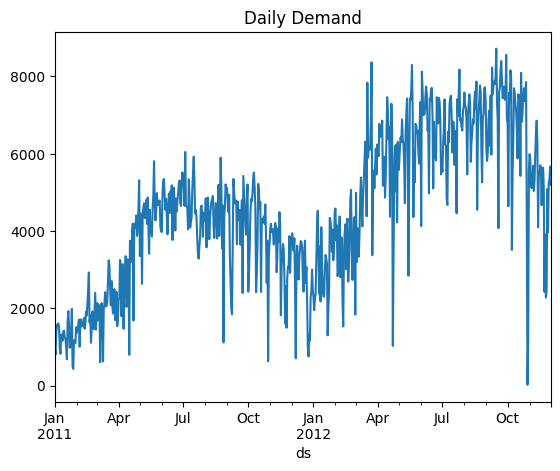

In [16]:
df_temp['y'].plot(title='Daily Demand')
plt.show()

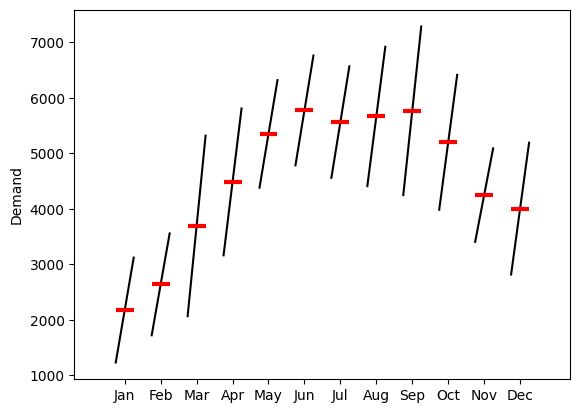

In [17]:
month_plot(df_temp['y'].resample('ME').mean(), ylabel='Demand')
plt.show()

/tmp/ipython-input-618132494.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_temp['y'].resample('Q').mean(), ylabel='Demand')


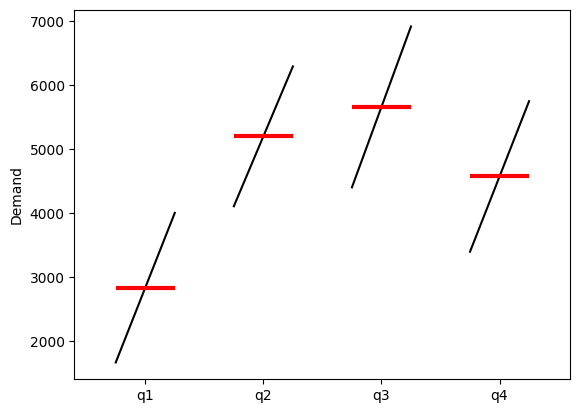

In [18]:
quarter_plot(df_temp['y'].resample('Q').mean(), ylabel='Demand')
plt.show()

In [19]:
# Check the holidays in our df
df.holiday[:5]

,holiday
0,0
1,0
2,0
3,0
4,0


### Holidays

In [20]:
# Check the holidays in our df
df[df.holiday == 1].ds

,ds
16,2011-01-17
51,2011-02-21
104,2011-04-15
149,2011-05-30
184,2011-07-04
247,2011-09-05
282,2011-10-10
314,2011-11-11
327,2011-11-24
359,2011-12-26


In [21]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [22]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


### Feature Engineering

In [23]:
for lag in [1,3,5,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
  df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)

df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN,NaN
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN,NaN


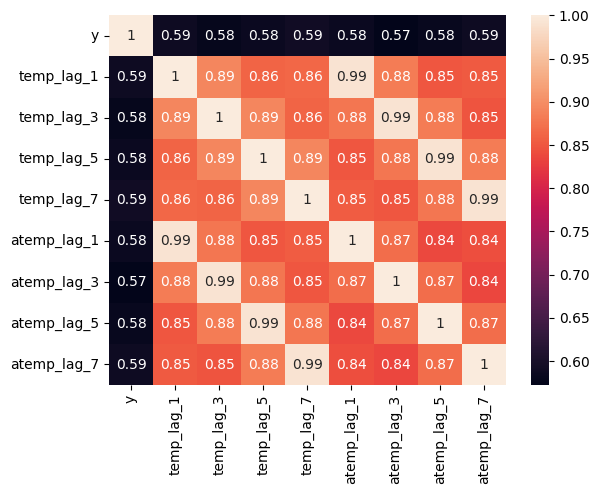

In [28]:
# Correlation matrix between the lagged values and y
columns = ['y'] + [f'temp_lag_{lag}' for lag in [1,3,5,7]] + [f'atemp_lag_{lag}' for lag in [1,3,5,7]]
sns.heatmap(df[columns].corr(),annot=True);

In [29]:
# Kick out all lagged vars but the temp_lag1
df = df.iloc[:,:-7]
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000


In [30]:
# Remove NAs
df = df.dropna()

### Prophet Model

In [31]:
# Look at df
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000
5,2011-01-06,0,1,0.204348,0.233209,0.518261,0.089565,1606,False,False,0.226957


In [32]:
# Remove any NAs
df = df.dropna()

In [65]:
from prophet import Prophet

In [66]:
# Building the Prophet model
m = Prophet(holidays=holidays,
            yearly_seasonality=True,
            weekly_seasonality=True,
            seasonality_mode="multiplicative",
            seasonality_prior_scale=10,
            holidays_prior_scale=10,
            changepoint_prior_scale=0.05)
m.add_regressor("workingday")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("temp_lag_1")
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/57u118_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/013_cpts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27088', 'data', 'file=/tmp/tmpx_u2h1fe/57u118_n.json', 'init=/tmp/tmpx_u2h1fe/013_cpts.json', 'output', 'file=/tmp/tmpx_u2h1fe/prophet_models_jejz_8/prophet_model-20250820135853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:58:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
# Regressir Coeficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.417132,0.417132,0.417132
1,weathersit_2,multiplicative,0.000000,-0.114571,-0.114571,-0.114571
2,weathersit_3,multiplicative,0.000000,-0.459085,-0.459085,-0.459085
3,hum,multiplicative,0.625459,-0.412483,-0.412483,-0.412483
4,windspeed,multiplicative,0.190577,-0.585479,-0.585479,-0.585479
5,temp,multiplicative,0.502959,1.136565,1.136565,1.136565
6,atemp,multiplicative,0.481015,0.373789,0.373789,0.373789
7,temp_lag_1,multiplicative,0.503024,-0.555689,-0.555689,-0.555689


In [68]:
from prophet.diagnostics import cross_validation


# Tham số Cross Validation trong Prophet

## Tham số bắt buộc

### `model` (bắt buộc)
- **Mô tả**: Đối tượng mô hình Prophet đã được fit (huấn luyện) với dữ liệu
- **Ví dụ**:
  ```python
  m = Prophet().fit(df)
  ```

### `horizon` (bắt buộc)
- **Mô tả**: Khoảng thời gian dự báo (forecast horizon) cho mỗi lần kiểm định chéo
- **Định dạng**: Chuỗi thời gian như `'30 days'`, `'6 months'`, `'12 hours'`, tùy thuộc vào tần suất dữ liệu (D cho ngày, H cho giờ, v.v.)
- **Ví dụ**: `horizon='30 days'` nghĩa là mỗi lần kiểm định, mô hình sẽ dự báo 30 ngày tiếp theo

## Tham số tùy chọn

### `period` (mặc định = 0.5 × horizon)
- **Mô tả**: Khoảng cách giữa các điểm cắt (cutoffs) trong kiểm định chéo, tức là bước nhảy của cửa sổ trượt
- **Ví dụ**: Nếu `period='15 days'`, các điểm cắt sẽ cách nhau 15 ngày
- **Ghi chú**: Nếu không chỉ định, Prophet mặc định lấy `period = 0.5 * horizon`

### `initial` (mặc định = 3 × horizon)
- **Mô tả**: Độ dài tối thiểu của dữ liệu huấn luyện ban đầu
- **Ví dụ**: Nếu `initial='180 days'`, mỗi lần huấn luyện sẽ sử dụng ít nhất 180 ngày dữ liệu trước điểm cắt
- **Ghi chú**: Nếu không chỉ định, Prophet mặc định lấy `initial = 3 * horizon`

### `parallel` (mặc định = None)
- **Mô tả**: Kích hoạt tính toán song song để tăng tốc độ
- **Giá trị có thể**:
  - `'processes'`: Sử dụng multiprocessing
  - `'threads'`: Sử dụng multithreading
  - `'dask'`: Sử dụng Dask (yêu cầu cài đặt thư viện Dask)
- **Ghi chú**: Nếu không chỉ định, tính toán sẽ chạy tuần tự

### `cutoffs` (mặc định = None)
- **Mô tả**: Danh sách các điểm cắt (cutoff points) cụ thể dưới dạng datetime để thực hiện kiểm định chéo
- **Ghi chú**: Nếu không chỉ định, Prophet sẽ tự động tạo các điểm cắt dựa trên `horizon`, `period`, và `initial`
=

In [69]:
# Apply the CV to the model
df_cv = cross_validation(model=m,
                         period = '15 days',
                         initial = '521 days',
                         horizon = '30 days',
                         parallel = 'processes')

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7985f3448140>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/_5etrf8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/4anl5vkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/f5q7z78v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38621', 'data', 'file=/tmp/tmpx_u2h1fe/_5etrf8b.json', 'init=/tmp/tmpx_u2h1fe/f5q7z78v.json', 'output', 'file=/tmp/tmpx_u2h1fe/prophet_model7qocu32x/prophet_model-20250820135856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/kq2cu_lr.json
13:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DE

In [70]:
df_cv.tail(31)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
269,2012-11-16,6221.234345,5409.699084,7005.492251,5698,2012-10-17
270,2012-11-02,6616.010834,5853.526487,7398.761061,5847,2012-11-01
271,2012-11-03,6004.571813,5215.838896,6801.966036,5138,2012-11-01
272,2012-11-04,6030.770091,5277.265996,6869.775278,5107,2012-11-01
273,2012-11-05,6149.923857,5313.369207,6944.615000,5259,2012-11-01
274,2012-11-06,5995.553587,5209.173122,6757.106804,5686,2012-11-01
275,2012-11-07,5135.503946,4301.435983,5946.611246,5035,2012-11-01
276,2012-11-08,6674.819813,5889.964371,7480.137058,5315,2012-11-01
277,2012-11-09,6465.302436,5667.893356,7249.484526,5992,2012-11-01
278,2012-11-10,6921.716943,6126.995385,7735.280891,6536,2012-11-01


In [71]:
# Performance Metrics
from prophet.diagnostics import performance_metrics
perform_df = performance_metrics(df_cv)

In [72]:
# RMSE and MAPE
rmse = perform_df['rmse'].mean()
mape = perform_df['mape'].mean()
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}")

RMSE: 1260.40
MAPE: 15.92


In [73]:
# Check the ERRORS:
df_cv['MAPE'] = abs(df_cv['yhat'] - df_cv['y']) / df_cv['y']
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,MAPE
0,2012-06-20,8216.488216,7483.216364,8859.853770,6211,2012-06-19,0.322893
1,2012-06-21,8505.514545,7849.840434,9263.824766,5905,2012-06-19,0.440392
2,2012-06-22,8141.968208,7464.644970,8805.243003,5823,2012-06-19,0.398243
3,2012-06-23,7729.301170,7060.399803,8425.634591,7458,2012-06-19,0.036377
4,2012-06-24,7884.653802,7178.903469,8528.831904,6891,2012-06-19,0.144196


In [63]:
df_cv[df_cv['MAPE'] > 1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,MAPE
290,2012-11-22,5550.079213,4754.597317,6348.097074,2425,2012-11-01,1.288692
292,2012-11-24,4864.942480,4067.032748,5652.892406,2277,2012-11-01,1.136558
293,2012-11-25,4989.151709,4237.351662,5814.263941,2424,2012-11-01,1.058231


In [64]:
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000
5,2011-01-06,0,1,0.204348,0.233209,0.518261,0.089565,1606,False,False,0.226957


### Parameter Tuning

In [74]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode': ['additive', 'multiplicative']
}

In [75]:
# Gemerate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prio

In [80]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:
  try:
    # build the model
    m = Prophet(holidays=holidays,
              yearly_seasonality=True,
              weekly_seasonality=True,
              **params)
    m.add_regressor("workingday")
    m.add_regressor("weathersit_2")
    m.add_regressor("weathersit_3")
    m.add_regressor("hum")
    m.add_regressor("windspeed")
    m.add_regressor("temp")
    m.add_regressor("atemp")
    m.add_regressor("temp_lag_1")
    m.fit(df)

    # Cross-validation
    df_cv = cross_validation(model=m,
                            period = '15 days',
                            initial = '521 days',
                            horizon = '30 days',
                            parallel = 'processes')

    # Compute and store the error
    rmse = performance_metrics(df_cv)['rmse'].mean()
    tuning_results.append(rmse)
  except:
    tuning_results.append(np.nan)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/fbzf3nnl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/3m9npgwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78081', 'data', 'file=/tmp/tmpx_u2h1fe/fbzf3nnl.json', 'init=/tmp/tmpx_u2h1fe/3m9npgwe.json', 'output', 'file=/tmp/tmpx_u2h1fe/prophet_modeld3_w77f6/prophet_model-20250820142037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <conc

In [81]:
outcome = pd.DataFrame(all_params)
outcome["rmse"] = tuning_results
outcome.head()

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.05,10,additive,10,984.711240
1,0.05,10,additive,20,982.840135
2,0.05,10,multiplicative,10,1260.395096
3,0.05,10,multiplicative,20,1259.718466
4,0.05,20,additive,10,982.098060


In [85]:
min_rmse_index = outcome[outcome['rmse'] == outcome['rmse'].min()].index

In [87]:
params = all_params[min_rmse_index[0]]

In [88]:
m = Prophet(holidays=holidays,
          yearly_seasonality=True,
          weekly_seasonality=True,
          **params)
m.add_regressor("workingday")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("temp_lag_1")
m.fit(df)

# Cross-validation
df_cv = cross_validation(model=m,
                        period = '15 days',
                        initial = '521 days',
                        horizon = '30 days',
                        parallel = 'processes')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/jkp41bbo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_u2h1fe/bdcvsv1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92734', 'data', 'file=/tmp/tmpx_u2h1fe/jkp41bbo.json', 'init=/tmp/tmpx_u2h1fe/bdcvsv1h.json', 'output', 'file=/tmp/tmpx_u2h1fe/prophet_modelwn5loox4/prophet_model-20250820143146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <conc

In [90]:
perform_df = performance_metrics(df_cv)

In [95]:
print(f"MAPE: {perform_df['mape'].mean()*100:.2f}%") # Decrease 3%

MAPE: 13.19%
